In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import warnings
from sklearn import pipeline,preprocessing,metrics,model_selection,ensemble
from sklearn_pandas import DataFrameMapper

In [2]:
weather = pd.read_csv("Weather_Dataset.csv",parse_dates=["Month"], index_col="Month")

In [3]:
weather

,Temperature
Month,
2010-01-01,21
2010-02-01,24
2010-03-01,30
2010-04-01,33
2010-05-01,36
...,...
2019-08-01,29
2019-09-01,29
2019-10-01,28


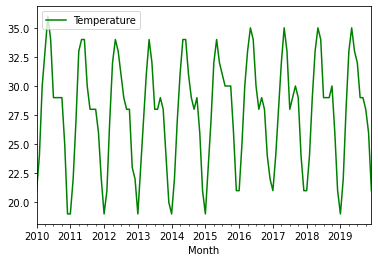

In [4]:
weather.plot(color='green')

In [5]:
X = weather.values
train = X[0:70] # data for training
test = X[70:] # data for testing
predictions = []

In [6]:
train.size # total no. of train data

70

# **Auto-Regressive Model**

In [7]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [9]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [10]:
predictions = model_ar_fit.predict(start=70,end=100)

In [11]:
test

array([[26],
       [21],
       [21],
       [25],
       [30],
       [33],
       [35],
       [34],
       [30],
       [28],
       [29],
       [28],
       [24],
       [22],
       [21],
       [24],
       [28],
       [32],
       [35],
       [33],
       [28],
       [29],
       [30],
       [29],
       [24],
       [21],
       [21],
       [24],
       [29],
       [33],
       [35],
       [34],
       [29],
       [29],
       [29],
       [30],
       [26],
       [21],
       [19],
       [22],
       [28],
       [33],
       [35],
       [33],
       [32],
       [29],
       [29],
       [28],
       [26],
       [21]], dtype=int64)

In [12]:
predictions

array([25.04898106, 20.66568024, 18.8376725 , 20.94717278, 26.72094645,
       30.94423858, 32.56670209, 32.19426158, 30.41357871, 30.25660949,
       30.59755505, 29.04052977, 25.5889904 , 20.92845302, 18.96743558,
       21.39228454, 26.00144303, 30.46273414, 32.29022598, 31.63971535,
       30.79655539, 30.52723804, 30.58125208, 29.26821763, 25.49283551,
       21.34605036, 19.47304808, 21.30745795, 25.82165134, 29.90248832,
       31.74869574])

In [13]:
print(test)
print(predictions)
for x in predictions:
    if x>=35:
        print ('Sunny')
    elif x>=25 and x<=35:
        print ('Haze')
    elif x<=25:
        print ('Cloudy')
    else:
        print ('Null')

[[26]
 [21]
 [21]
 [25]
 [30]
 [33]
 [35]
 [34]
 [30]
 [28]
 [29]
 [28]
 [24]
 [22]
 [21]
 [24]
 [28]
 [32]
 [35]
 [33]
 [28]
 [29]
 [30]
 [29]
 [24]
 [21]
 [21]
 [24]
 [29]
 [33]
 [35]
 [34]
 [29]
 [29]
 [29]
 [30]
 [26]
 [21]
 [19]
 [22]
 [28]
 [33]
 [35]
 [33]
 [32]
 [29]
 [29]
 [28]
 [26]
 [21]]
[25.04898106 20.66568024 18.8376725  20.94717278 26.72094645 30.94423858
 32.56670209 32.19426158 30.41357871 30.25660949 30.59755505 29.04052977
 25.5889904  20.92845302 18.96743558 21.39228454 26.00144303 30.46273414
 32.29022598 31.63971535 30.79655539 30.52723804 30.58125208 29.26821763
 25.49283551 21.34605036 19.47304808 21.30745795 25.82165134 29.90248832
 31.74869574]
Haze
Cloudy
Cloudy
Cloudy
Haze
Haze
Haze
Haze
Haze
Haze
Haze
Haze
Haze
Cloudy
Cloudy
Cloudy
Haze
Haze
Haze
Haze
Haze
Haze
Haze
Haze
Haze
Cloudy
Cloudy
Cloudy
Haze
Haze
Haze


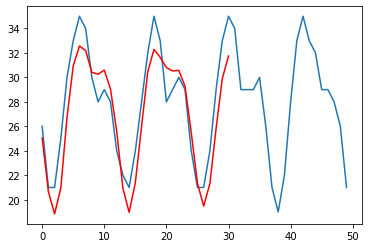

In [14]:
plt.plot(test) # taken data as test
plt.plot(predictions,color='red') # predicted data